In [1]:
!pip install ultralytics==8.3.76
!pip install ffmpeg
!pip install roboflow

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.76 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24111MiB)
Setup complete ✅ (64 CPUs, 62.6 GB RAM, 2127.8/3666.0 GB disk)


In [2]:
from ultralytics import YOLO

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/home/bnflab/Documents/cell_det/yolov11


In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from roboflow import Roboflow
rf = Roboflow(api_key="gll2896CrCZNHnWfq710")
project = rf.workspace("facialai-nfkit").project("rooftop-hixra")
version = project.version(1)
dataset = version.download("yolov11")
                              

/home/bnflab/Documents/cell_det/yolov11/datasets


/home/bnflab/Documents/cell_det/yolov11/yolo11env/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to rooftop-1 in yolov11:: 100%|██████████| 498/498 [00:00<00:00, 7391.68it/s]


In [5]:
!sed -i '$d' {dataset.location}/data.yaml   # Delete the last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the second-to-last line
!sed -i '$d' {dataset.location}/data.yaml   # Delete the third-to-last line

!echo 'test: ../test/images' >> {dataset.location}/data.yaml
!echo 'train: ../train/images' >> {dataset.location}/data.yaml
!echo 'val: ../valid/images' >> {dataset.location}/data.yaml

In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data={dataset.location}/data.yaml epochs=120 imgsz=640 plots=True

/home/bnflab/Documents/cell_det/yolov11


New https://pypi.org/project/ultralytics/8.3.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.76 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24111MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/bnflab/Documents/cell_det/yolov11/datasets/rooftop-1/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

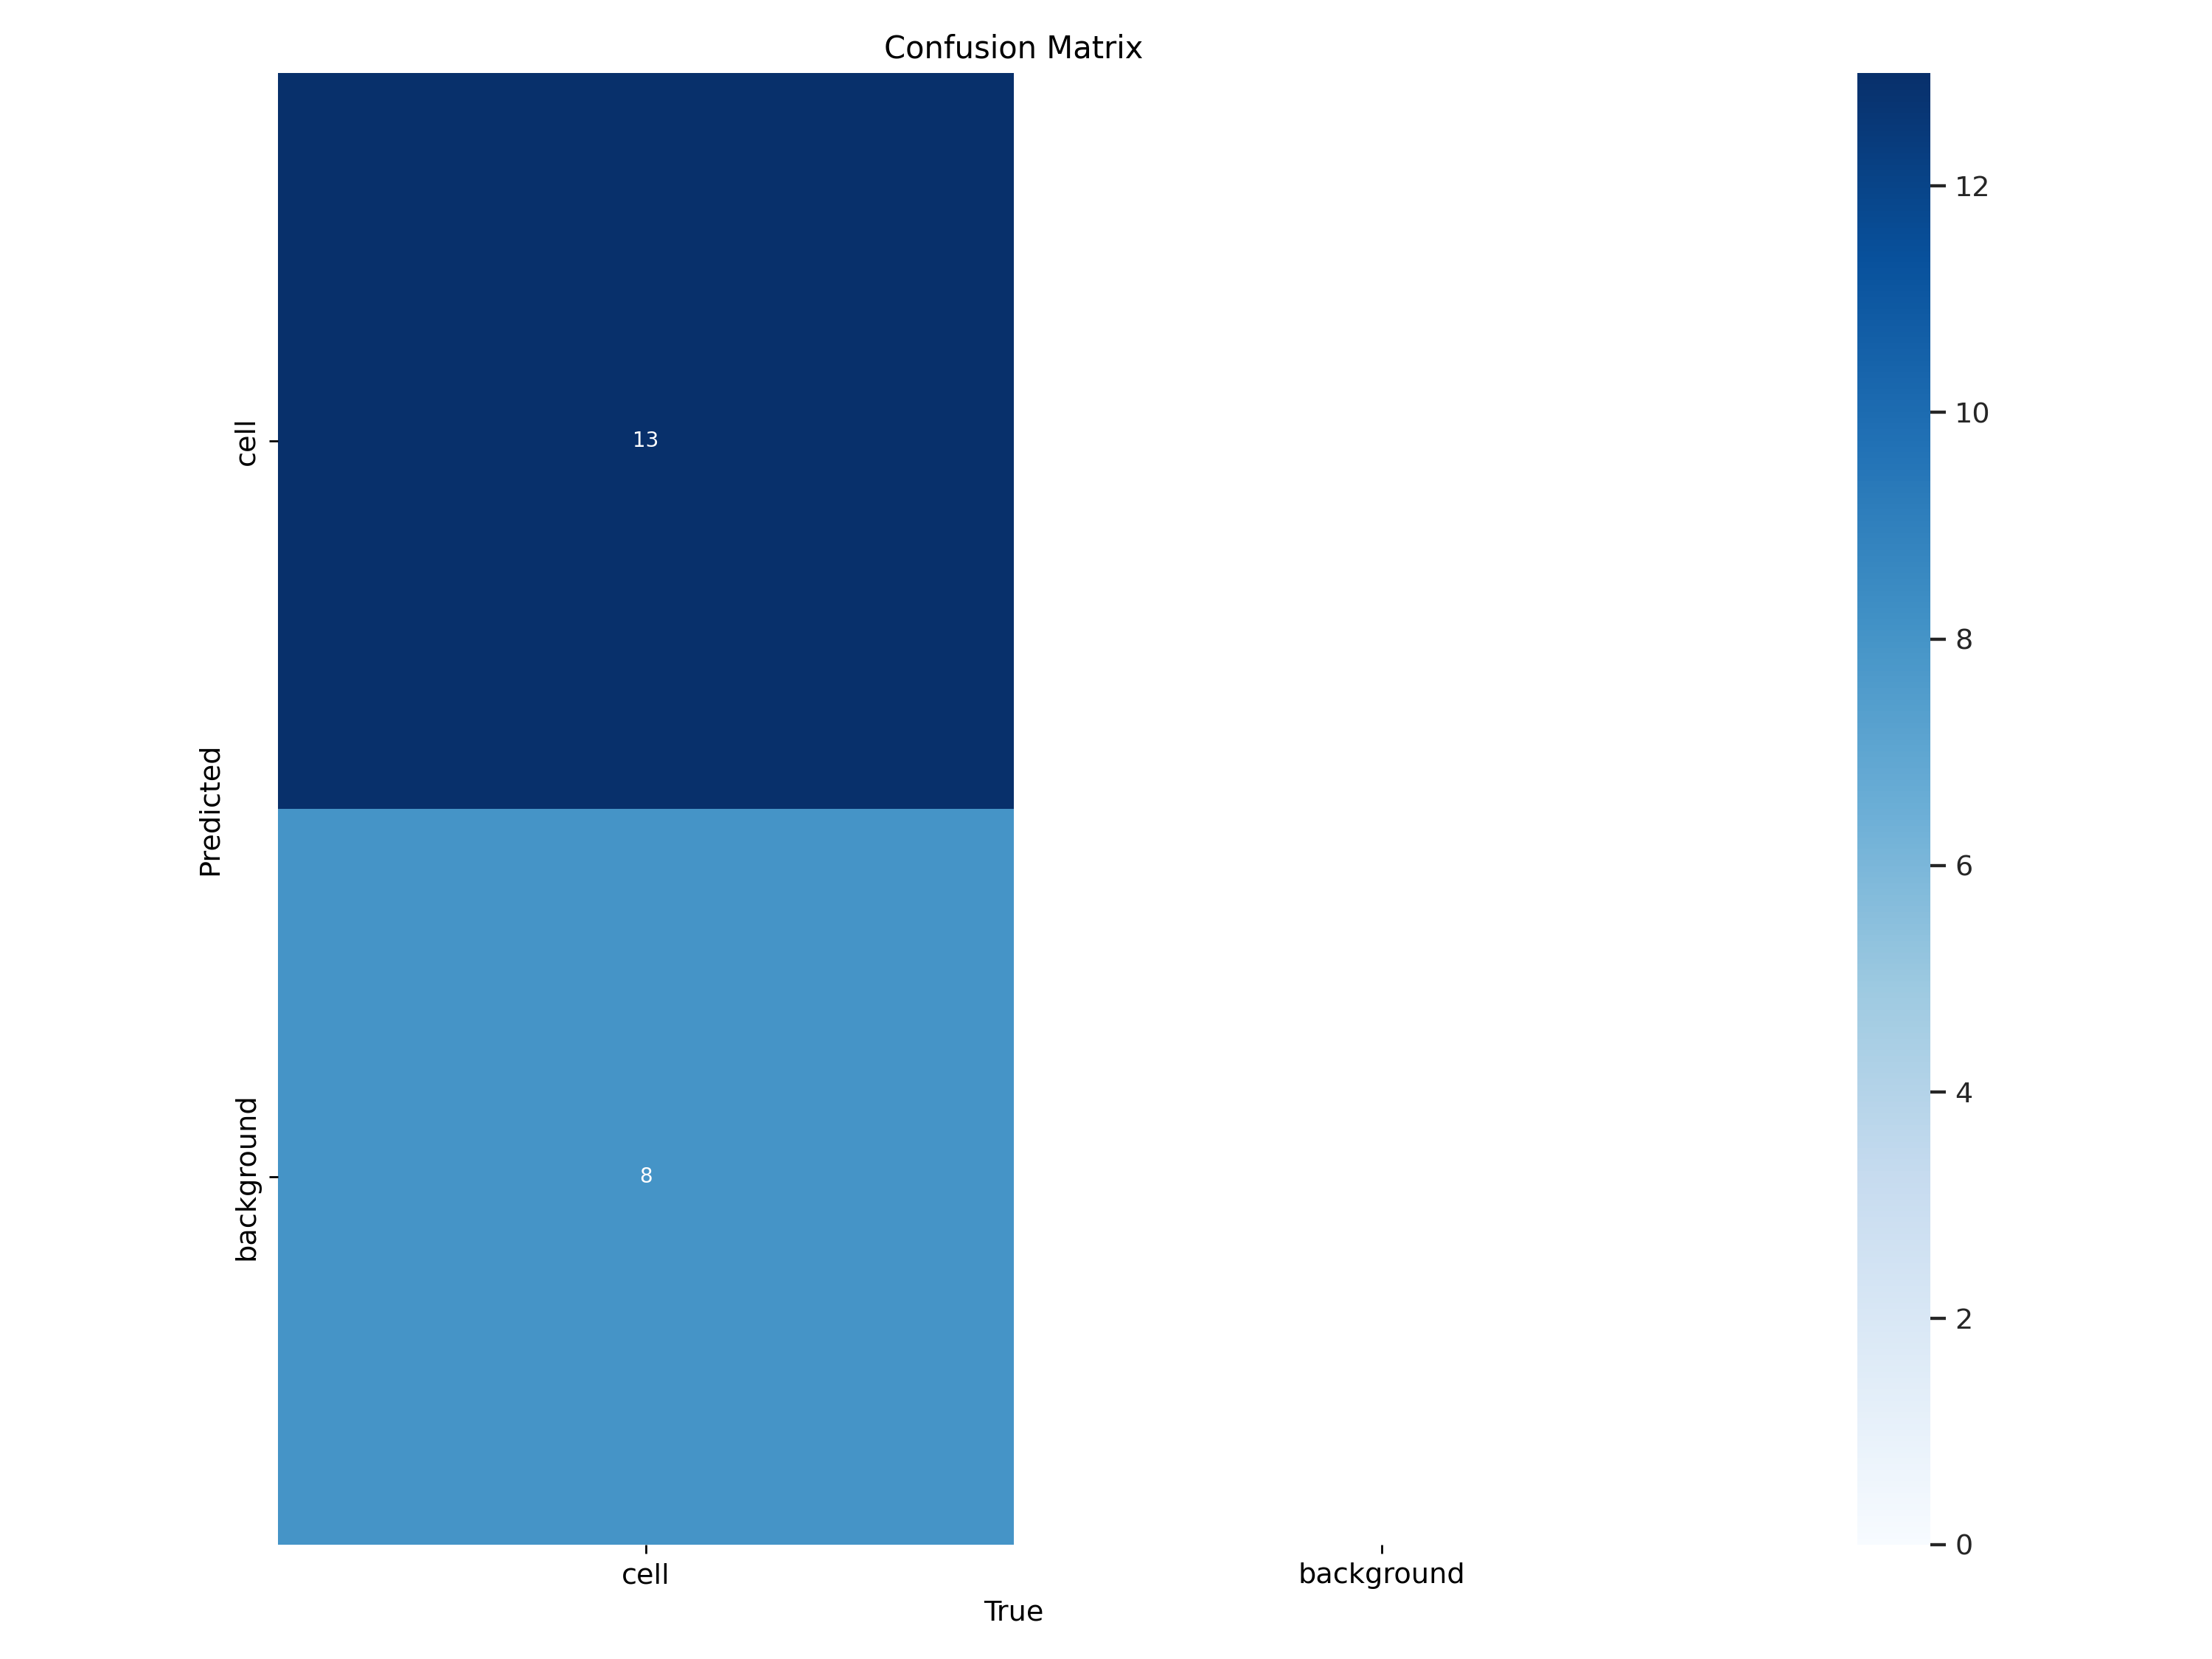

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

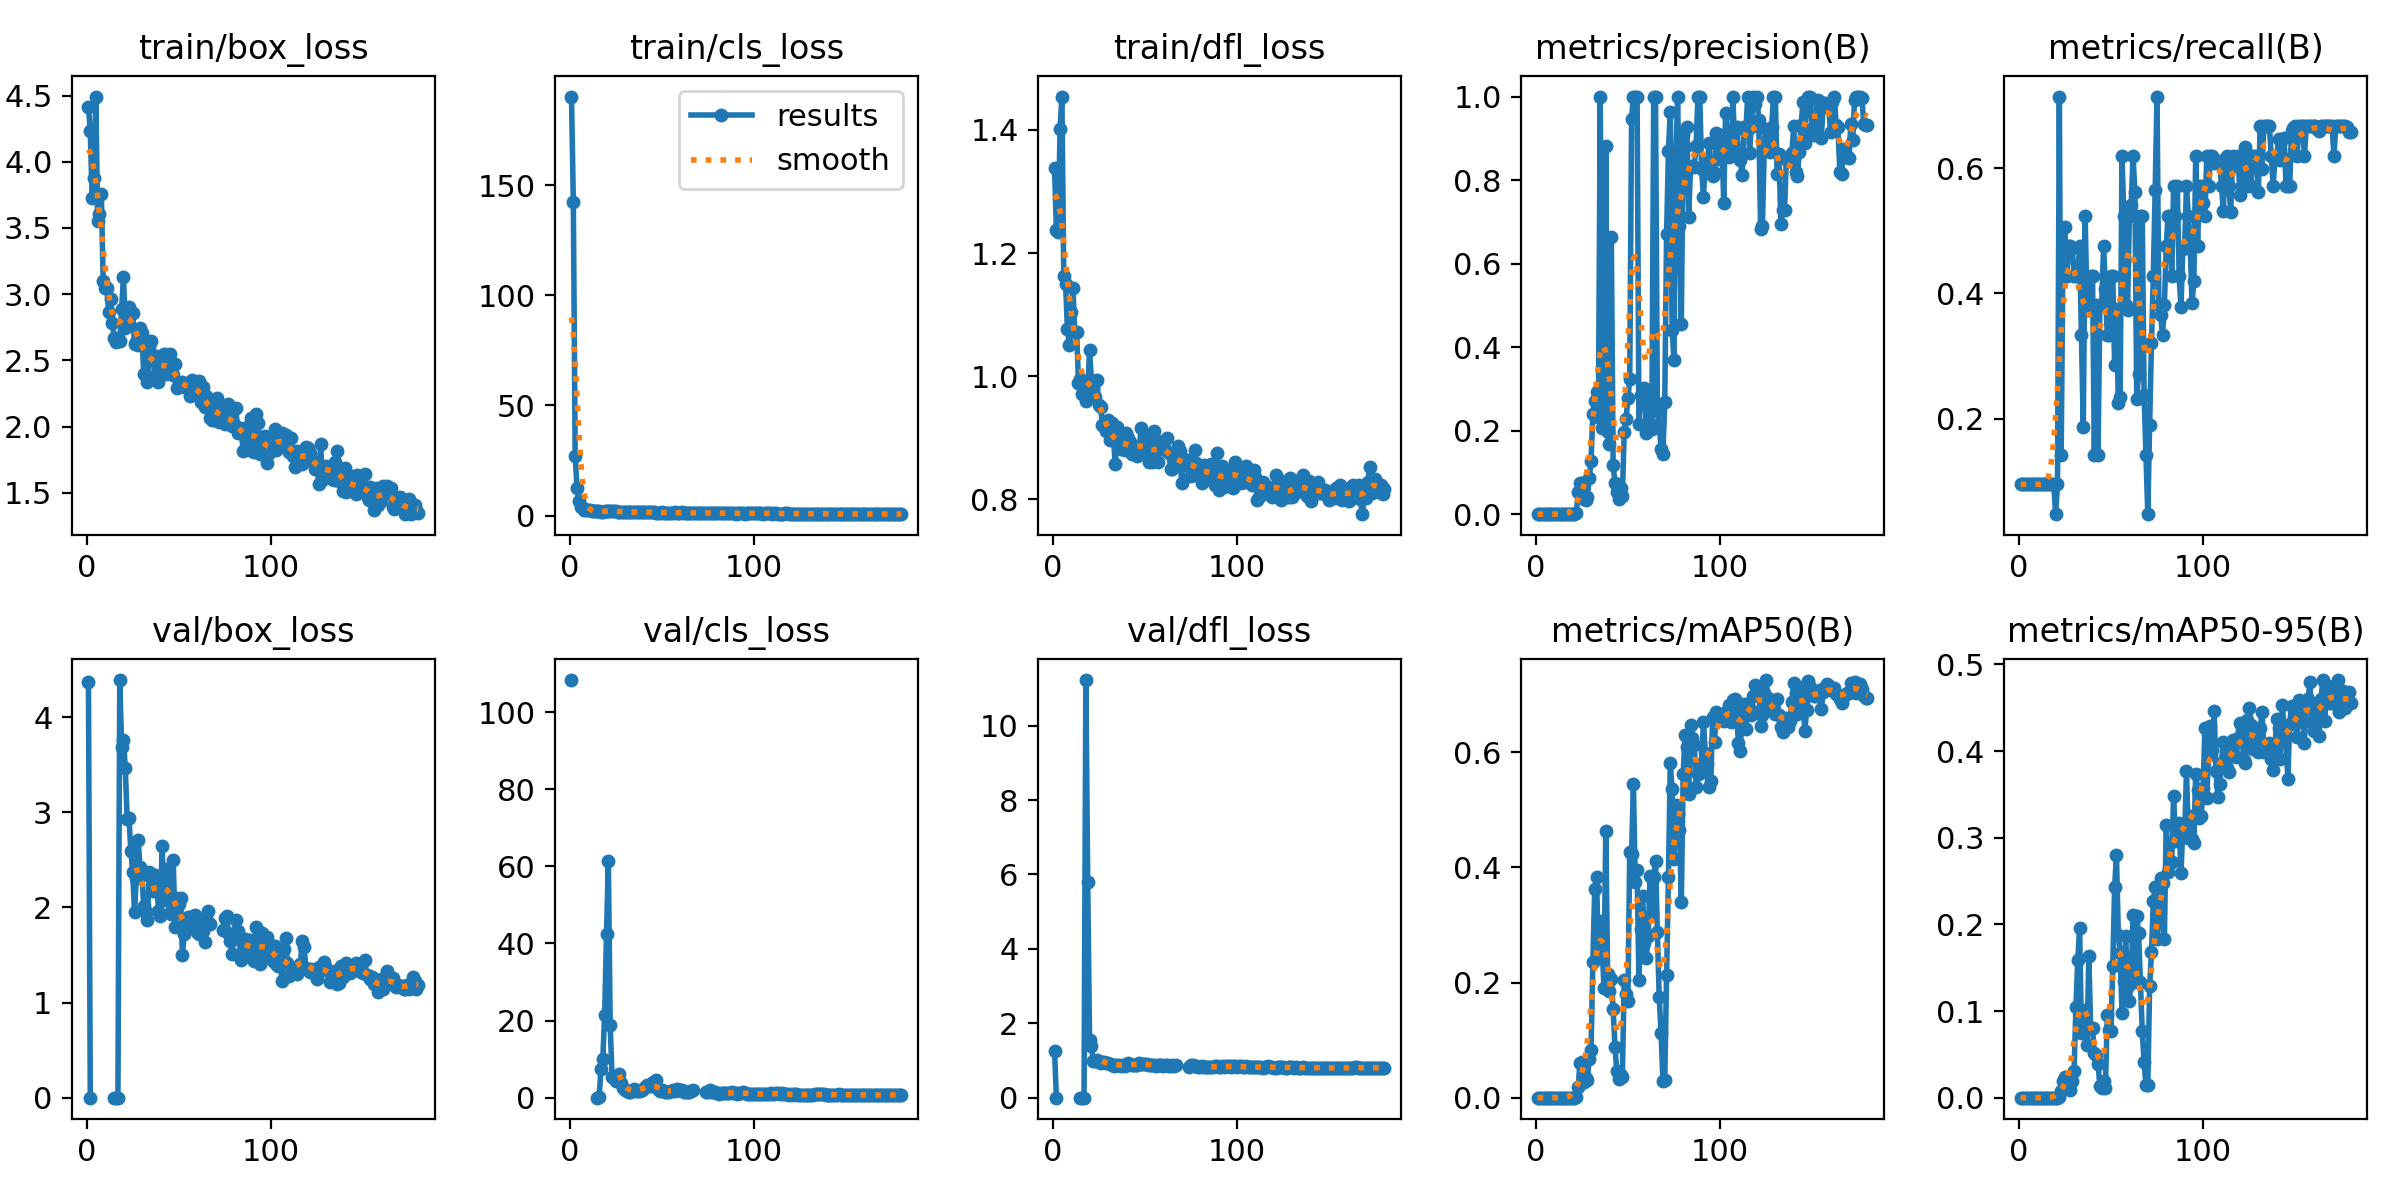

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)